In [ ]:
# 24 May 2025

<h1 style="line-height:3rem;">GDP Vs Fertility Rate </h1>

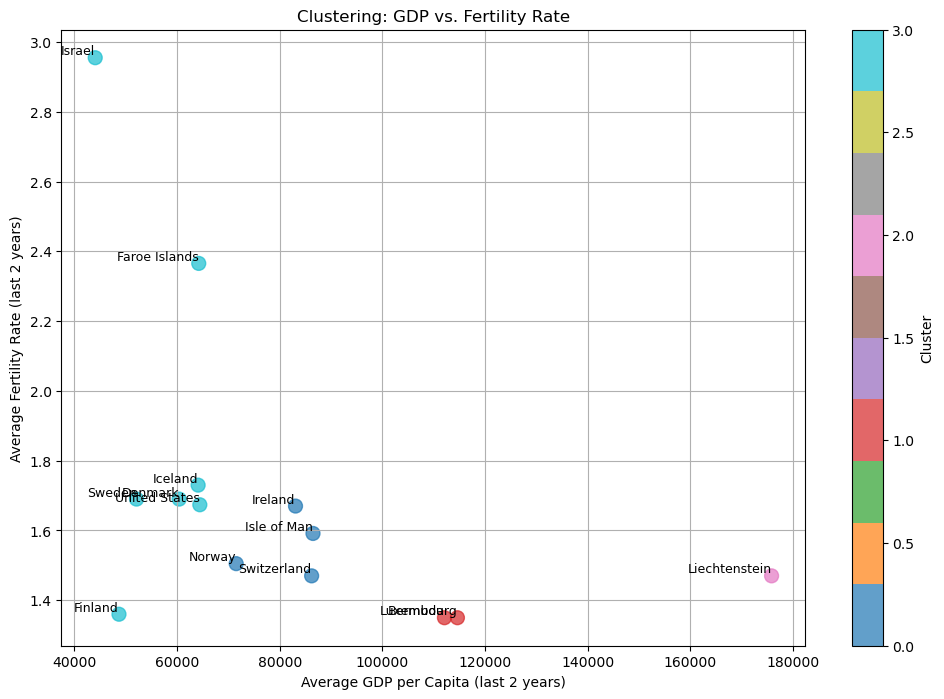

,Country,Avg_GDP,Avg_Fertility,Cluster
137,Liechtenstein,175813.875592,1.470000,2
144,Luxembourg,114616.657923,1.350000,1
27,Bermuda,112088.963081,1.350000,1
108,Isle of Man,86481.552591,1.591500,0
37,Switzerland,86215.777956,1.470000,0
111,Ireland,83077.190241,1.670000,0
177,Norway,71524.715344,1.505000,0
251,United States,64436.486324,1.673750,3
78,Faroe Islands,64225.264905,2.365500,3
114,Iceland,64105.821139,1.730000,3


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os 

# Set working environment
cwd = os.getcwd() 
env_name = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost')

# Load datasets
if env_name == "Localhost":
    df_fertility = pd.read_csv('../datasets/New/Fertility_Rate.csv')
    df_gdp = pd.read_csv('../datasets/New/gdp_per_capita.csv')
else: 
    df = pd.read_csv("/kaggle/input/sports-football-1872-2025/Sports_Football_1872_2025.csv")

# Clustering function
def clustering_life_expectancy_against_gdp(
    top_n=30,
    n_years=2,
    n_clusters=4,
    include_countries=None
):
    # Extract year columns that are digits only
    def get_year_columns(df):
        return [col for col in df.columns if col.isdigit()]

    fertility_years = get_year_columns(df_fertility)
    gdp_years = get_year_columns(df_gdp)
    common_years = sorted(set(fertility_years).intersection(gdp_years))
    last_n_years = common_years[-n_years:]

    # Calculate averages over the last n_years
    df_fertility['Avg_Fertility'] = df_fertility[last_n_years].mean(axis=1, skipna=True)
    df_gdp['Avg_GDP'] = df_gdp[last_n_years].mean(axis=1, skipna=True)

    # Merge on country code
    merged = pd.merge(
        df_fertility[['Country Name', 'Country Code', 'Avg_Fertility']],
        df_gdp[['Country Name', 'Code', 'Avg_GDP']],
        left_on='Country Code',
        right_on='Code',
        how='inner'
    )

    # Drop missing values
    merged.dropna(subset=['Avg_GDP', 'Avg_Fertility'], inplace=True)

    # Rename for clarity
    merged.rename(columns={'Country Name_x': 'Country'}, inplace=True)

    # Get top_n countries by Avg_GDP
    top_gdp_countries = merged.sort_values(by='Avg_GDP', ascending=False).head(top_n)

    # If include_countries is specified, add those rows as well
    if include_countries is not None:
        include_rows = merged[merged['Country'].isin(include_countries)]
        merged_filtered = pd.concat([top_gdp_countries, include_rows]).drop_duplicates(subset='Country')
    else:
        merged_filtered = top_gdp_countries

    # Adjust number of clusters
    if len(merged_filtered) < n_clusters:
        n_clusters = max(1, len(merged_filtered))

    # Clustering
    X = merged_filtered[['Avg_GDP', 'Avg_Fertility']]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    merged_filtered['Cluster'] = kmeans.fit_predict(X)

    # Plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        merged_filtered['Avg_GDP'], 
        merged_filtered['Avg_Fertility'], 
        c=merged_filtered['Cluster'], 
        cmap='tab10', 
        s=100, 
        alpha=0.7
    )
    plt.xlabel(f'Average GDP per Capita (last {n_years} years)')
    plt.ylabel(f'Average Fertility Rate (last {n_years} years)')
    plt.title('Clustering: GDP vs. Fertility Rate')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)

    # Label points
    for _, row in merged_filtered.iterrows():
        plt.text(row['Avg_GDP'], row['Avg_Fertility'], row['Country'], fontsize=9, ha='right', va='bottom')

    plt.show()

    # Style table
    styled = merged_filtered[['Country', 'Avg_GDP', 'Avg_Fertility', 'Cluster']].style.background_gradient(
        subset=['Avg_GDP', 'Avg_Fertility'], cmap='viridis'
    )

    return styled

# Example usage
styled_table = clustering_life_expectancy_against_gdp(
    top_n=10,
    include_countries=["Finland", "Sweden", "Denmark", "Israel", "Norway"]
)
styled_table


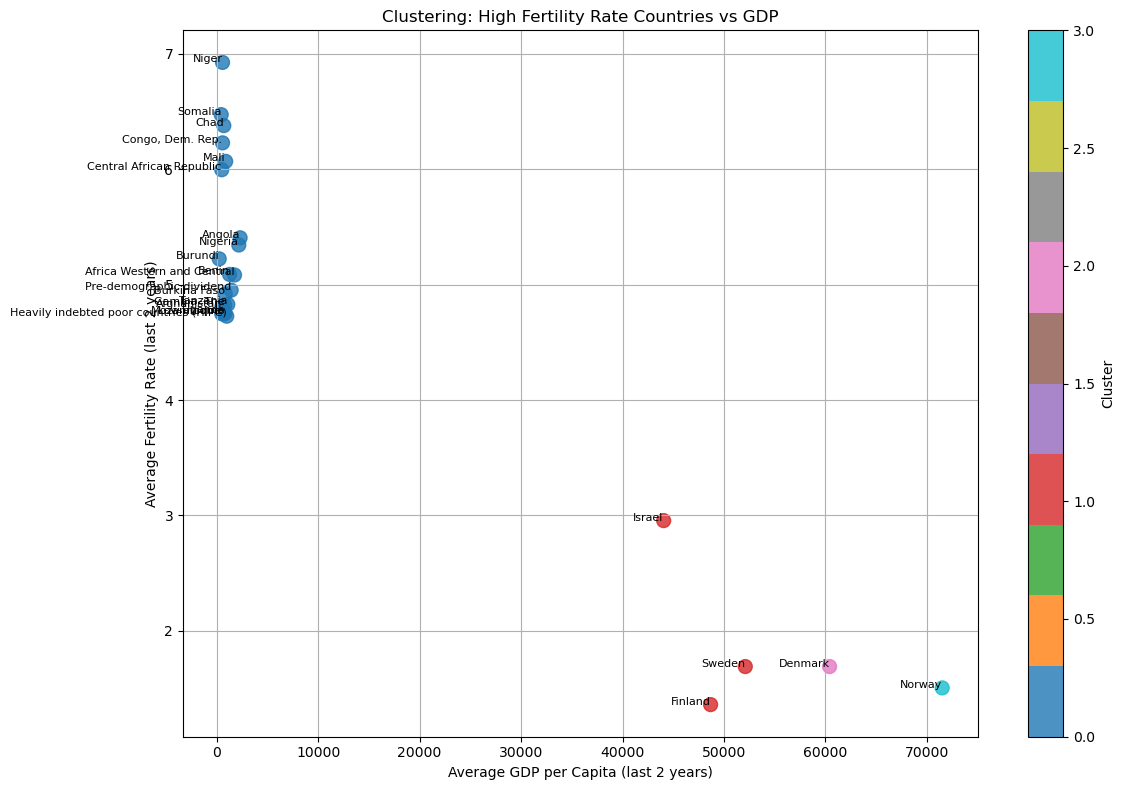

,Country,Avg_GDP,Avg_Fertility,Cluster
173,Niger,560.884641,6.926500,0
213,Somalia,428.824987,6.474000,0
229,Chad,684.405044,6.379000,0
43,"Congo, Dem. Rep.",562.333632,6.229500,0
158,Mali,870.748103,6.069000,0
34,Central African Republic,480.351952,5.996500,0
4,Angola,2292.896478,5.406500,0
174,Nigeria,2163.475562,5.344000,0
16,Burundi,233.602158,5.224000,0
18,Benin,1255.278239,5.089000,0


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def clustering_high_fertility_countries(
    top_n=20,
    n_years=2,
    n_clusters=4,
    include_countries=None
):
    # Use existing df_fertility and df_gdp (assumed to be loaded globally)

    # Extract columns with years
    def get_year_columns(df):
        return [col for col in df.columns if col.isdigit()]

    fertility_years = get_year_columns(df_fertility)
    gdp_years = get_year_columns(df_gdp)
    common_years = sorted(set(fertility_years).intersection(gdp_years))
    last_n_years = common_years[-n_years:]

    # Compute average fertility and GDP for last n years
    df_fertility['Avg_Fertility'] = df_fertility[last_n_years].mean(axis=1, skipna=True)
    df_gdp['Avg_GDP'] = df_gdp[last_n_years].mean(axis=1, skipna=True)

    # Merge datasets
    merged = pd.merge(
        df_fertility[['Country Name', 'Country Code', 'Avg_Fertility']],
        df_gdp[['Country Name', 'Code', 'Avg_GDP']],
        left_on='Country Code',
        right_on='Code',
        how='inner'
    )

    # Clean and rename
    merged.dropna(subset=['Avg_GDP', 'Avg_Fertility'], inplace=True)
    merged.rename(columns={'Country Name_x': 'Country'}, inplace=True)

    # Get top N countries by fertility
    top_fertility = merged.sort_values(by='Avg_Fertility', ascending=False).head(top_n)

    # Add include_countries
    if include_countries is not None:
        include_rows = merged[merged['Country'].isin(include_countries)]
        merged_filtered = pd.concat([top_fertility, include_rows]).drop_duplicates(subset='Country')
    else:
        merged_filtered = top_fertility

    # Adjust clusters
    if len(merged_filtered) < n_clusters:
        n_clusters = max(1, len(merged_filtered))

    # Clustering
    X = merged_filtered[['Avg_GDP', 'Avg_Fertility']]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    merged_filtered['Cluster'] = kmeans.fit_predict(X)

    # Plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        merged_filtered['Avg_GDP'],
        merged_filtered['Avg_Fertility'],
        c=merged_filtered['Cluster'],
        cmap='tab10',
        s=100,
        alpha=0.8
    )
    plt.xlabel(f'Average GDP per Capita (last {n_years} years)')
    plt.ylabel(f'Average Fertility Rate (last {n_years} years)')
    plt.title('Clustering: High Fertility Rate Countries vs GDP')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)

    # Add labels
    for _, row in merged_filtered.iterrows():
        plt.text(row['Avg_GDP'], row['Avg_Fertility'], row['Country'], fontsize=8, ha='right')

    plt.tight_layout()
    plt.show()

    # Style output table
    styled = merged_filtered[['Country', 'Avg_GDP', 'Avg_Fertility', 'Cluster']].style.background_gradient(
        subset=['Avg_GDP', 'Avg_Fertility'], cmap='viridis'
    )

    return styled

# Example usage:
styled_table = clustering_high_fertility_countries(
    top_n=20,
    include_countries=["Finland", "Sweden", "Denmark", "Israel", "Norway"]
)
styled_table


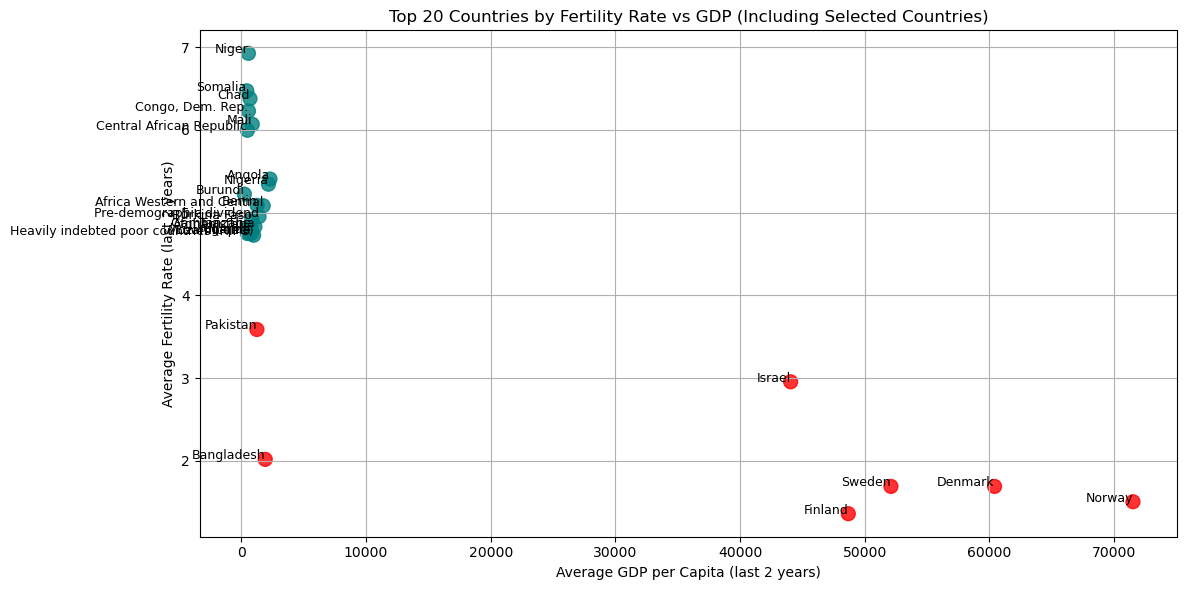

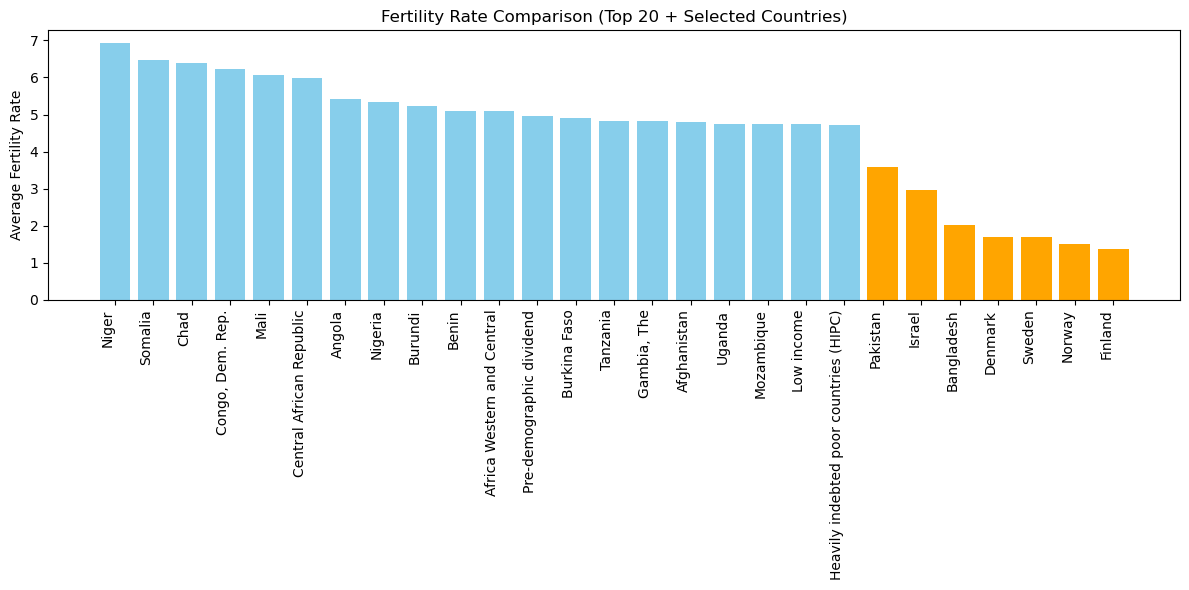

,Country,Avg_Fertility,Avg_GDP
173,Niger,6.926500,560.884641
213,Somalia,6.474000,428.824987
229,Chad,6.379000,684.405044
43,"Congo, Dem. Rep.",6.229500,562.333632
158,Mali,6.069000,870.748103
34,Central African Republic,5.996500,480.351952
4,Angola,5.406500,2292.896478
174,Nigeria,5.344000,2163.475562
16,Burundi,5.224000,233.602158
18,Benin,5.089000,1255.278239


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_fertility_vs_gdp_and_bar(
    top_n=20,
    n_years=2,
    include_countries=None
):
    # Use preloaded df_fertility and df_gdp

    # Extract year columns
    def get_year_columns(df):
        return [col for col in df.columns if col.isdigit()]
    
    fertility_years = get_year_columns(df_fertility)
    gdp_years = get_year_columns(df_gdp)
    common_years = sorted(set(fertility_years).intersection(gdp_years))
    last_n_years = common_years[-n_years:]

    # Average calculations
    df_fertility['Avg_Fertility'] = df_fertility[last_n_years].mean(axis=1, skipna=True)
    df_gdp['Avg_GDP'] = df_gdp[last_n_years].mean(axis=1, skipna=True)

    # Merge datasets
    merged = pd.merge(
        df_fertility[['Country Name', 'Country Code', 'Avg_Fertility']],
        df_gdp[['Country Name', 'Code', 'Avg_GDP']],
        left_on='Country Code',
        right_on='Code',
        how='inner'
    )
    merged.rename(columns={'Country Name_x': 'Country'}, inplace=True)
    merged.dropna(subset=['Avg_GDP', 'Avg_Fertility'], inplace=True)

    # Top N by fertility
    top_fertility = merged.sort_values(by='Avg_Fertility', ascending=False).head(top_n)

    # Include user-defined countries
    if include_countries is not None:
        include_rows = merged[merged['Country'].isin(include_countries)]
        merged_filtered = pd.concat([top_fertility, include_rows]).drop_duplicates(subset='Country')
    else:
        merged_filtered = top_fertility

    # Add flag for highlighting in bar chart
    merged_filtered['Highlight'] = merged_filtered['Country'].isin(include_countries)

    # Sort by fertility for plotting
    merged_filtered = merged_filtered.sort_values(by='Avg_Fertility', ascending=False)

    # === SCATTER PLOT ===
    plt.figure(figsize=(12, 6))
    plt.scatter(
        merged_filtered['Avg_GDP'],
        merged_filtered['Avg_Fertility'],
        c=merged_filtered['Highlight'].map({True: 'red', False: 'teal'}),
        s=100,
        alpha=0.8
    )
    for _, row in merged_filtered.iterrows():
        plt.text(row['Avg_GDP'], row['Avg_Fertility'], row['Country'], fontsize=9, ha='right')
    plt.xlabel(f'Average GDP per Capita (last {n_years} years)')
    plt.ylabel(f'Average Fertility Rate (last {n_years} years)')
    plt.title(f'Top {top_n} Countries by Fertility Rate vs GDP (Including Selected Countries)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === BAR CHART ===
    plt.figure(figsize=(12, 6))
    bars = plt.bar(
        merged_filtered['Country'],
        merged_filtered['Avg_Fertility'],
        color=merged_filtered['Highlight'].map({True: 'orange', False: 'skyblue'})
    )
    plt.xticks(rotation=90, ha='right')
    plt.ylabel('Average Fertility Rate')
    plt.title(f'Fertility Rate Comparison (Top {top_n} + Selected Countries)')
    plt.tight_layout()
    plt.show()

    # Return DataFrame
    return merged_filtered[['Country', 'Avg_Fertility', 'Avg_GDP']]

# Example usage
result_table = plot_top_fertility_vs_gdp_and_bar(
    top_n=20,
    include_countries=["Finland", "Sweden", "Denmark", "Israel", "Norway", "Pakistan", "Bangladesh"]
)
result_table
